In [9]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import ast

In [11]:
# Specify the file path for the TSV file
file_path = 'C:/Users/seinj/Teaching/EMG-ECG analysis/results_elevated_ecg.tsv'

# Read the TSV file into a DataFrame
data = pd.read_csv(file_path, sep='\t')

# Display the loaded DataFrame
print(data)

  Participant_ID  ECG_Rate_Mean        HRV_MeanNN          HRV_SDNN  \
0           pb04      72.132494  [[834.14473684]]  [[229.19995671]]   
1           pb06      78.063444  [[777.89086294]]  [[284.90628925]]   
2           pb05     101.973465  [[589.78026071]]   [[82.79966011]]   

         HRV_SDANN1        HRV_SDNNI1        HRV_SDANN2        HRV_SDNNI2  \
0   [[53.32995346]]   [[99.95290746]]    [[59.5730679]]  [[202.35222801]]   
1  [[103.97678314]]  [[246.78057016]]  [[119.87791432]]   [[276.1169339]]   
2   [[14.64338241]]   [[80.62436501]]   [[14.31985258]]    [[78.9015518]]   

  HRV_SDANN5 HRV_SDNNI5  ...      HRV_SampEn      HRV_ShanEn     HRV_FuzzyEn  \
0    [[nan]]    [[nan]]  ...  [[0.28784501]]  [[7.19731457]]  [[0.33901018]]   
1    [[nan]]    [[nan]]  ...  [[0.60639748]]  [[7.58125299]]  [[0.64737369]]   
2    [[nan]]    [[nan]]  ...  [[1.15382468]]  [[7.39184886]]  [[0.97345626]]   

         HRV_MSEn       HRV_CMSEn      HRV_RCMSEn          HRV_CD  \
0  [[0.39726006]

In [4]:
# Define a function to extract numeric values from a string in the specified format
def extract_numeric_from_string(cell_value):
    try:
        return float(cell_value[2:-2]) if isinstance(cell_value, object) else cell_value
    except ValueError:
        return cell_value

In [12]:
# Apply the function to all cells except 'Participant_ID' column and numeric columns
non_numeric_columns = ['Participant_ID', 'ECG_Rate_Mean']  # Add other numeric column names as needed
columns_to_apply = data.columns.difference(non_numeric_columns)

data[columns_to_apply] = data[columns_to_apply].map(lambda x: extract_numeric_from_string(x) if pd.notna(x) else x)

# Display the updated DataFrame
print(data)

  Participant_ID  ECG_Rate_Mean  HRV_MeanNN    HRV_SDNN  HRV_SDANN1  \
0           pb04      72.132494  834.144737  229.199957   53.329953   
1           pb06      78.063444  777.890863  284.906289  103.976783   
2           pb05     101.973465  589.780261   82.799660   14.643382   

   HRV_SDNNI1  HRV_SDANN2  HRV_SDNNI2  HRV_SDANN5  HRV_SDNNI5  ...  \
0   99.952907   59.573068  202.352228         NaN         NaN  ...   
1  246.780570  119.877914  276.116934         NaN         NaN  ...   
2   80.624365   14.319853   78.901552         NaN         NaN  ...   

   HRV_SampEn  HRV_ShanEn  HRV_FuzzyEn  HRV_MSEn  HRV_CMSEn  HRV_RCMSEn  \
0    0.287845    7.197315     0.339010  0.397260   0.633726    0.545143   
1    0.606397    7.581253     0.647374  0.717967   0.967208    0.869605   
2    1.153825    7.391849     0.973456  1.131837   1.405383    1.667090   

     HRV_CD   HRV_HFD   HRV_KFD   HRV_LZC  
0  0.231793  1.784491  1.398209  0.676568  
1  0.739441  1.897140  2.343574  0.700268  
2

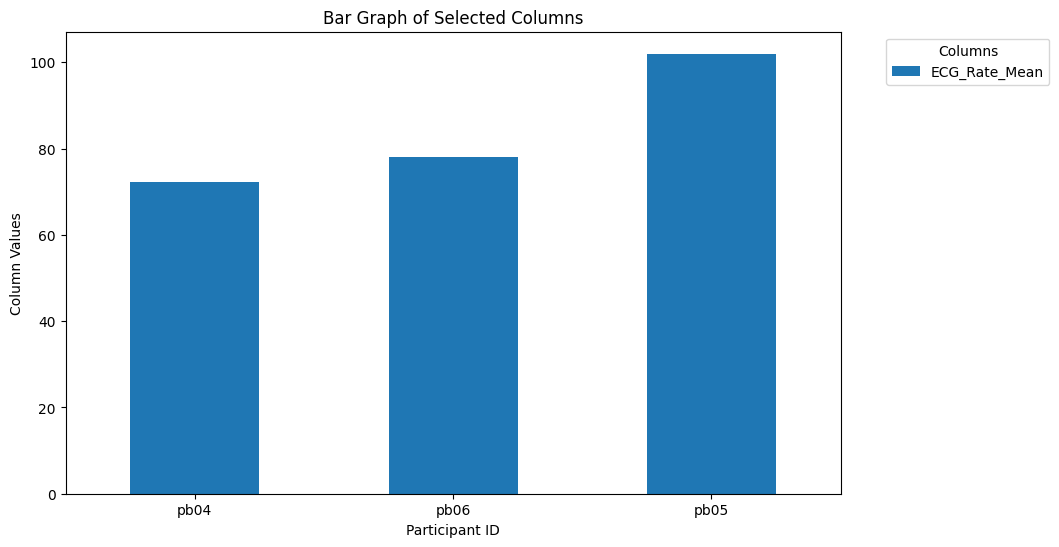

In [13]:
# Specify the variables of interest 
selected_columns = ['ECG_Rate_Mean']  

# Select the specified columns from the DataFrame
selected_data = data[['Participant_ID'] + selected_columns]

# Plot a bar graph
selected_data.set_index('Participant_ID').plot(kind='bar', rot=0, figsize=(10, 6))

# Customize the plot
plt.title('Bar Graph of Selected Columns')
plt.xlabel('Participant ID')
plt.ylabel('Column Values')
plt.legend(title='Columns', bbox_to_anchor=(1.05, 1), loc='upper left')

# Show the plot
plt.show()

In [14]:
# Load data from other conditions 
# file_path = 'C:/Users/seinj/Teaching/EMG-ECG analysis/results_base_ground_ecg.tsv'
# data_base_ground = pd.read_csv(file_path, sep='\t')
# data_base_ground[columns_to_apply] = data_base_ground[columns_to_apply].map(lambda x: extract_numeric_from_string(x) if pd.notna(x) else x)

# file_path = 'C:/Users/seinj/Teaching/EMG-ECG analysis/results_base_elevated_ecg.tsv'
# data_base_elevated = pd.read_csv(file_path, sep='\t')
# data_base_elevated[columns_to_apply] = data_base_elevated[columns_to_apply].map(lambda x: extract_numeric_from_string(x) if pd.notna(x) else x)

# file_path = 'C:/Users/seinj/Teaching/EMG-ECG analysis/results_walk_ground_ecg.tsv'
# data_walk_ground = pd.read_csv(file_path, sep='\t')
# data_walk_ground[columns_to_apply] = data_walk_ground[columns_to_apply].map(lambda x: extract_numeric_from_string(x) if pd.notna(x) else x)

# file_path = 'C:/Users/seinj/Teaching/EMG-ECG analysis/results_walk_elevated_ecg.tsv'
# data_walk_elevated = pd.read_csv(file_path, sep='\t')
# data_walk_elevated[columns_to_apply] = data_walk_elevated[columns_to_apply].map(lambda x: extract_numeric_from_string(x) if pd.notna(x) else x)


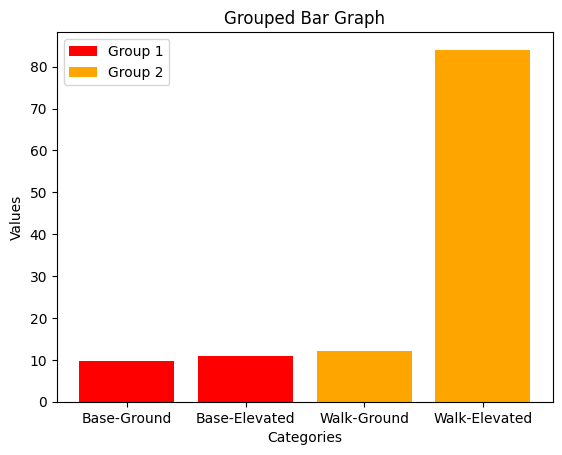

In [17]:
# Sample data
categories = ['Base-Ground', 'Base-Elevated', 'Walk-Ground', 'Walk-Elevated']
values = [np.mean([8,10,11]), np.mean([9, 11, 13]), np.mean([10,12,14]), np.mean(data.ECG_Rate_Mean)]

# Set up positions for the bars
bar_positions = np.arange(len(categories))

# Plot the grouped bars
plt.bar(bar_positions[:2], values[:2], label='Group 1', color='red')
plt.bar(bar_positions[2:], values[2:], label='Group 2', color='orange')

# Set labels, title, and legend
plt.xlabel('Categories')
plt.ylabel('Values')
plt.title('Grouped Bar Graph')
plt.xticks(bar_positions, categories)
plt.legend()

# Show the plot
plt.show()